In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np  
bs = 64

In [3]:
path = Path('/notebooks/storage/data/dogs_cats_simple')
path_train = path/'train'
path_test = path/'test'

In [4]:
fnames = get_image_files(path_train)

In [46]:
len(get_image_files(path_test))

12500

In [5]:
np.random.seed(2)
pat = r'/([^/]+)\.\d+.jpg$'

In [6]:
doc( ImageDataBunch.from_name_re)

In [7]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs, test=path_test
                                  ).normalize(imagenet_stats)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [13]:
learn.save('stage-1')

In [10]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,dog,dog,cat
Path: /notebooks/storage/data/dogs_cats_simple;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,dog,cat,dog,dog
Path: /notebooks/storage/data/dogs_cats_simple;

Test: LabelList (12500 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /notebooks/storage/data/dogs_cats_simple, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dila

In [63]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [13]:
interp = ClassificationInterpretation.from_learner(learn)

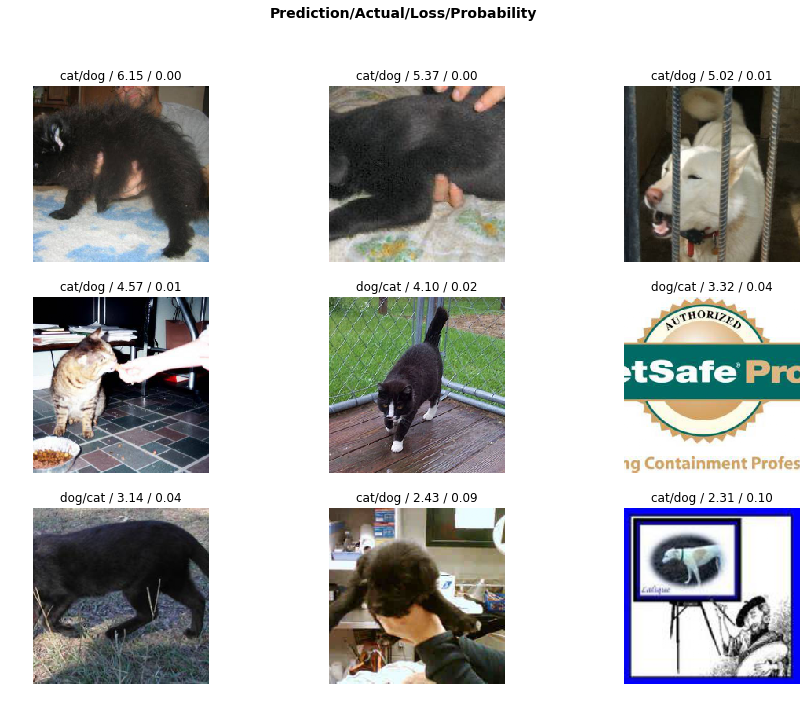

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

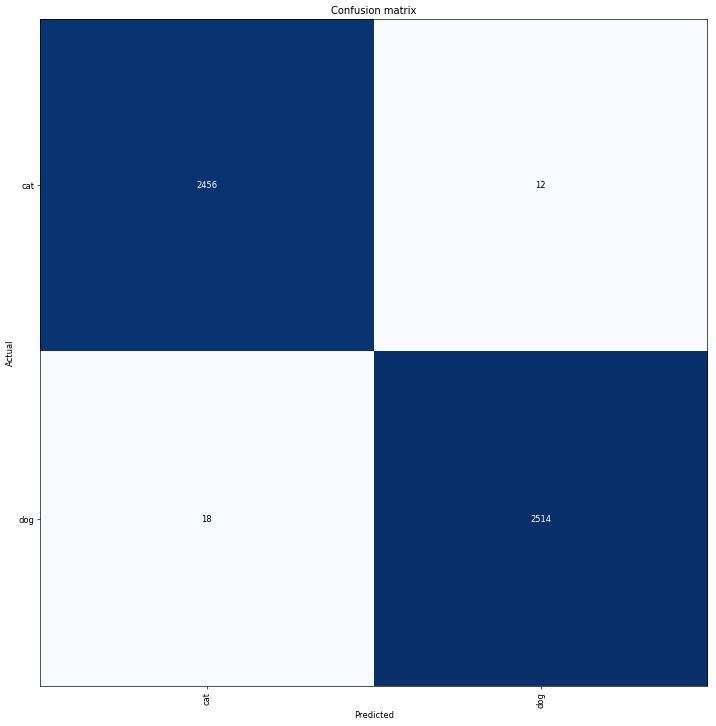

In [29]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
preds, y, losses = learn.get_preds(ds_type=DatasetType.Test, with_loss=True)

In [26]:
doc(get_preds)

In [41]:
classification = np.array(torch.argmax(preds, dim=1))
print(classification.shape)

(12500,)


In [59]:
ids = np.array(range(1, 12501))
print(ids.shape)

(12500,)


In [60]:
subm = np.stack([ids,classification], axis=1)

In [61]:
print(subm[0])

[1 0]


In [62]:
np.savetxt('submission.csv', subm, fmt='%d,%.5f', header='id,label', comments='')